In [1]:
import os, sys
sys.path.append(os.path.abspath('../'))

In [1]:
from typing import cast
import os
from PIL import Image
from llama_index.core import PromptTemplate, Settings
from llama_index.core.indices import MultiModalVectorStoreIndex, load_index_from_storage
from llama_index.multi_modal_llms.openai import OpenAIMultiModal

from settings import EMBEDDING_MODEL, INDEX_ID, OPENAI_API_KEY
from stores import init_storage_context

from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode
from matplotlib import pyplot as plt

/home/pranav/.miniconda3/envs/rag2/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Helper Functions

In [2]:
def plot_images(image_paths):
    images_shown = 0
    plt.figure(figsize=(16, 9))
    for img_path in image_paths:
        if os.path.isfile(img_path):
            image = Image.open(img_path)
            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 9:
                break

## Init Retriever and Query Engine

In [3]:
Settings.embed_model = EMBEDDING_MODEL
storage_context = init_storage_context()
index = cast(
    MultiModalVectorStoreIndex,
    load_index_from_storage(storage_context=storage_context, index_id=INDEX_ID),
)

qa_tmpl_str = (
    "Context information is below.\n"
    "---------------------\n"
    "{context_str}\n"
    "---------------------\n"
    "Given the context information and not prior knowledge, "
    "answer the query.\n"
    "Query: {query_str}\n"
    "Answer: "
)
qa_tmpl = PromptTemplate(qa_tmpl_str)

llm = OpenAIMultiModal(model="gpt-4o", api_key=OPENAI_API_KEY, max_new_tokens=200)

/home/pranav/.miniconda3/envs/rag2/lib/python3.12/site-packages/torch/cuda/__init__.py:141: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


In [5]:
retriever = index.as_retriever(similarity_top_k=4, image_similarity_top_k=4)
query_engine = index.as_query_engine(llm=llm)

## Visualize Retrieved Documents

In [13]:
query = '''ML/DL applications in smart grid'''
retrieval_results = retriever.retrieve(query)

3072
512


RETRIEVED TEXT


**Node ID:** 18c08972-9b42-4dba-8243-c16a0fdc6e83<br>**Similarity:** 0.657343864440918<br>**Text:** Price 
3. Energy consumption 
4. Fault detection 
5. Sizing 
6. Network anomaly detection 
7. Security breach detection  
8. Fraud detection  
9. Optimum schedule 
10. Stability of the SG 
 
 
Fig....<br>

**Node ID:** 1cc1a36b-5a41-4afe-be6e-4fe776aa55a0<br>**Similarity:** 0.6698775291442871<br>**Text:** 1.  A Basic Architecture of Smart Grid. 
 
As depicted on the Fig. 1 various components of the grid system are linked together 
with sensing nodes and communication paths to provide interoperabilit...<br>

**Node ID:** f358ccd7-18d6-49c0-ac72-2741b05c90aa<br>**Similarity:** 0.6814929246902466<br>**Text:** Further wind power is also considered as a rapidly 
growing energy source. Same like solar power, wind power poses many obstacles es-
pecially in power generation and transmission, such as varying ...<br>

**Node ID:** 023940bb-1514-4128-b6c5-621e520fac92<br>**Similarity:** 0.6935014724731445<br>**Text:**  Confidentiality: This ensures only authorized personnel will have the access to the 
critical and confidential information which is really necessary for preventing unau-
thorized disclosure of in...<br>

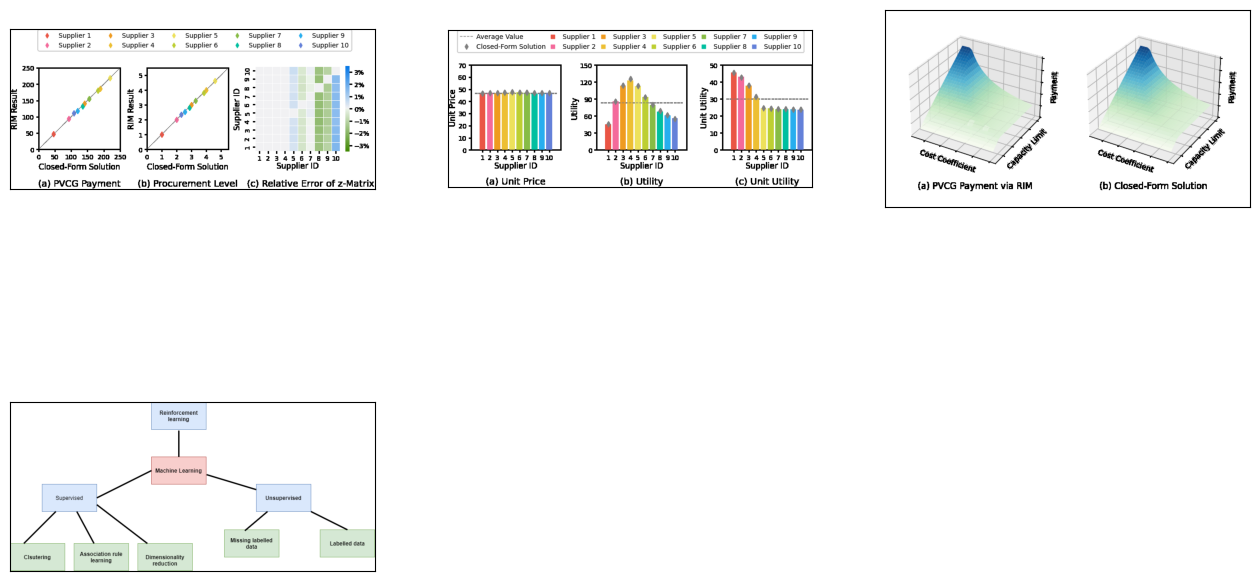

In [14]:
retrieved_image = []

print("RETRIEVED TEXT")
for res_node in retrieval_results:
    if isinstance(res_node.node, ImageNode):
        retrieved_image.append(res_node.node.image_path)
    else:
        display_source_node(res_node, source_length=200)

plot_images(retrieved_image)

## Visualize LLM Response with RAG

In [15]:
query = "ML/DL applications in Smart Grid"
print(query_engine.query(query))

3072
512
The applications of Machine Learning (ML) and Deep Learning (DL) in Smart Grids (SG) include:

1. **Energy Forecasting**: ML and DL are used to predict energy generation, especially for renewable sources like solar energy, which are affected by factors such as weather and seasonal changes.

2. **Protection and Security**: These technologies help in real-time condition monitoring, diagnostic, and outage monitoring to ensure reliable energy delivery. They also enhance security to protect against cyber-attacks in the IoT network of the SG.

3. **Fault Detection**: Identifying and diagnosing faults in the grid to maintain stability and prevent outages.

4. **Network Anomaly Detection**: Monitoring the network for unusual patterns that may indicate issues or inefficiencies.

5. **Security Breach Detection**: Detecting unauthorized access or breaches in the grid's communication network.

6. **Fraud Detection**: Identifying fraudulent activities related to energy consumption and bill